In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN

In [2]:
df1 = pd.read_csv('dataset1.csv')
df2 = pd.read_csv('dataset2.csv')
df3 = pd.read_csv('dataset3.csv')
y1 = df1['LABEL']
y2 = df2['LABEL']
y3 = df3['LABEL']
df1.drop(columns='LABEL', inplace=True)
df2.drop(columns='LABEL', inplace=True)
df3.drop(columns='LABEL', inplace=True)
df1

,F0,F1,F2,F3
0,-2.182270,8.795186,5.469284,-0.237966
1,3.698693,3.215945,-10.741661,10.535512
2,-7.254824,-7.197825,-7.556684,7.881214
3,-3.186120,9.625962,5.670878,2.904450
4,2.279499,3.920786,-9.580430,9.072586
...,...,...,...,...
995,-6.423739,-4.715107,-9.481846,8.251363
996,1.512494,4.195893,-12.076637,8.739949
997,3.123122,5.222823,-9.056304,9.759858
998,1.133059,5.116752,-8.712263,10.870868


### Задание 1
Предварительный анализ датасетов:

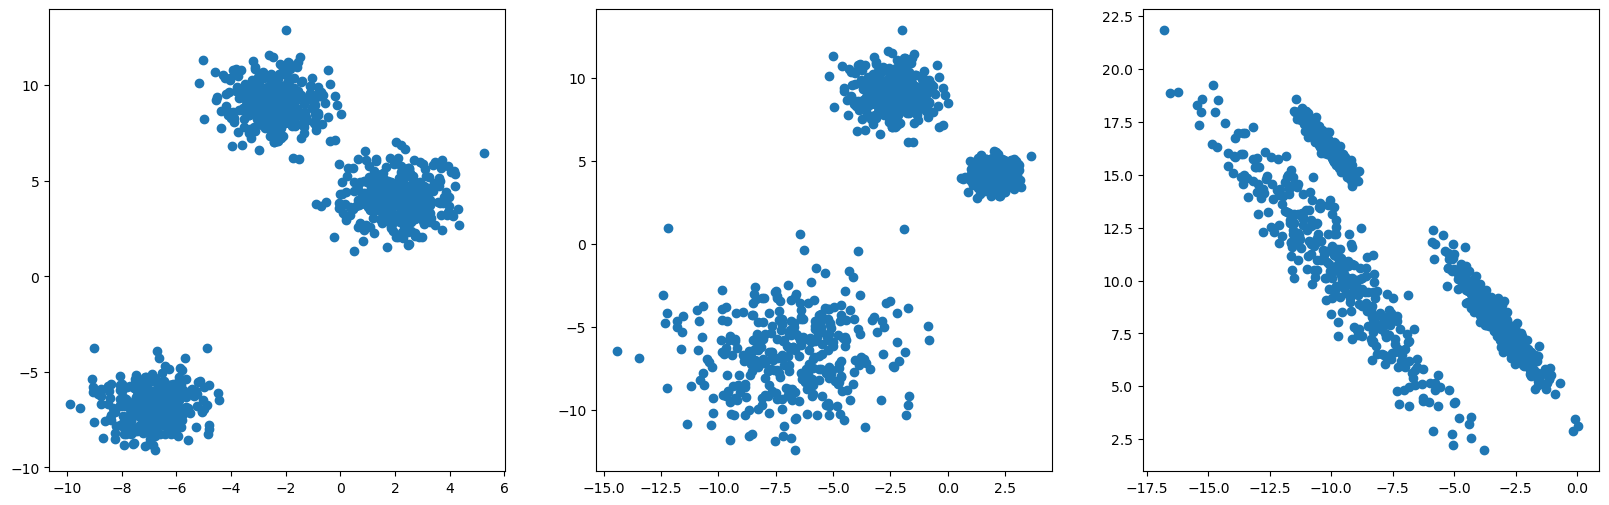

In [42]:
fig, ax = plt.subplots(1, 3, figsize=(20, 6))
ax[0].scatter(df1['F0'], df1['F1'])
ax[1].scatter(df2['F0'], df2['F1'])
ax[2].scatter(df3['F0'], df3['F1'])

In [36]:
dbscan = DBSCAN(eps=1.5, min_samples=5)
dbscan.fit(df3, y=y3)

DBSCAN(eps=1.5)

In [44]:
uniques, u_count = np.unique(dbscan.labels_, return_counts=True)
print(uniques)
print(u_count)

[-1  0  1  2]
[  5 331 333 331]


### Задания 2 и 3
Непосредственно кластеризация:

In [47]:
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(df1, y=y1)
kmeans.cluster_centers_

array([[ 2.08128181,  4.08135021, -9.6546176 ,  9.43829232],
       [-2.47972233,  9.03626136,  4.68100968,  2.02428364],
       [-6.8836951 , -6.74468537, -8.85281957,  7.31515829]])

In [48]:
cluster1 = KMeans(n_clusters=2, random_state=42)
cluster1.fit(df2, y=y2)
cluster2 = AgglomerativeClustering(n_clusters=2, linkage='complete')
cluster2.fit(df2, y=y2)

AgglomerativeClustering(linkage='complete')

In [58]:
cluster1.labels_[:40]

array([1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1])

In [59]:
cluster2.labels_[:40]

array([0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0], dtype=int64)

In [62]:
cluster1.labels_[:200] - cluster2.labels_[:200]

array([ 1,  0, -1,  1,  0,  1, -1,  1, -1,  0,  1, -1,  1,  1,  1,  1,  1,
        1,  0,  1, -1,  0, -1,  1, -1,  0,  1,  0,  0, -1, -1, -1,  0,  0,
        0,  0,  1, -1,  0,  1, -1,  0, -1,  0,  0,  1,  0,  0,  0, -1,  1,
        0, -1, -1,  1,  1, -1, -1, -1, -1,  1,  1,  0,  1, -1,  0,  1, -1,
        1, -1,  1,  1,  0,  0,  1,  1, -1,  0, -1,  1,  1,  1,  1, -1, -1,
        1,  1,  0, -1,  1,  0, -1,  1, -1,  1,  0,  0,  1,  1,  0,  1, -1,
        0, -1, -1, -1,  1, -1, -1,  0,  1, -1, -1,  0,  0, -1,  0, -1,  0,
       -1, -1, -1,  1, -1, -1,  0,  1, -1,  0, -1, -1,  0,  0, -1,  0, -1,
        1, -1,  0, -1, -1,  1, -1, -1, -1, -1,  1, -1,  1, -1,  0,  0,  0,
        0,  0, -1, -1,  0,  1,  1, -1, -1,  1, -1,  1,  0,  0,  0, -1, -1,
       -1,  1,  1, -1,  0,  0,  1,  0,  0,  0, -1,  1, -1,  0,  1,  0,  1,
        0,  1, -1,  0, -1,  0, -1,  0,  1,  0, -1,  1,  0], dtype=int64)

In [66]:
print(cluster1.labels_[:36])
print(np.array(y1)[:36])

[1 0 0 1 0 1 0 1 0 0 1 0 1 1 1 1 1 1 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0]
[0 2 1 0 2 0 1 0 1 2 0 1 0 0 0 0 0 0 2 0 1 2 1 0 1 2 0 2 2 1 1 1 2 2 2 2]


In [67]:
uniques, u_count = np.unique(cluster2.labels_, return_counts=True)
print(uniques)
print(u_count)

[0 1]
[667 333]


In [68]:
print(cluster2.labels_[:36])
print(np.array(y2)[:36])

[0 0 1 0 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 1 1 1 0 0 0 0]
[0 2 1 0 2 0 1 0 1 2 0 1 0 0 0 0 0 0 2 0 1 2 1 0 1 2 0 2 2 1 1 1 2 2 2 2]


### Задания 4 и 5
Кластеризация DBSCAN:

In [70]:
dbscan = DBSCAN(eps=0.3, min_samples=10, metric='euclidean')
dbscan.fit(df3, y=y3)

DBSCAN(eps=0.3, min_samples=10)

In [71]:
uniques, u_count = np.unique(dbscan.labels_, return_counts=True)
print(uniques)
print(u_count)

[-1  0  1  2  3  4  5]
[484 300  50 136   9  10  11]


In [72]:
dbscan = DBSCAN(eps=1.5, min_samples=8, metric='euclidean')
dbscan.fit(df3, y=y3)

DBSCAN(eps=1.5, min_samples=8)

In [73]:
uniques, u_count = np.unique(dbscan.labels_, return_counts=True)
print(uniques)
print(u_count)

[-1  0  1  2]
[ 16 331 333 320]


In [79]:
print(dbscan.labels_[:16])
print(np.array(y3)[:16])

[0 1 2 0 1 0 2 0 2 1 0 2 0 0 0 0]
[0 2 1 0 2 0 1 0 1 2 0 1 0 0 0 0]


In [80]:
print(dbscan.labels_[36:52])
print(np.array(y3)[36:52])

[0 2 1 0 2 1 2 1 1 0 1 1 1 2 0 1]
[0 1 2 0 1 2 1 2 2 0 2 2 2 1 0 2]
